In [1]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()

C:\Users\Rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [3]:
print(boston)


{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

# sklearn returns Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the regression targets, ‘DESCR’, the full description of the dataset, and ‘filename’, the physical location of boston csv dataset.

In [4]:
print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


(506, 13)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
#The details about the features and more information about the dataset can be seen by using boston.DESCR
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
#Before applying any model we have to convert this to a pandas dataframe, 
#which we can do by calling the dataframe on boston.data. We also adds the target variable to the dataframe from boston.target
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['PRICE'] = boston.target

print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [7]:
#Get some statistics from dataset
print(bos.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [8]:
#initialize linear regression model
reg=LinearRegression()

In [9]:
#split into training-67% & testing data-33%
X_train, X_test, Y_train, Y_test = train_test_split(bos, bos['PRICE'], test_size = 0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 14)
(167, 14)
(339,)
(167,)


In [10]:
#train model with our training data
reg.fit(X_train,Y_train)

LinearRegression()

In [11]:
print(reg.coef_)

[ 6.05979592e-16  4.09394740e-16 -8.79071121e-16  2.64338231e-15
  3.01350318e-14  1.05777474e-16 -2.95770353e-16  4.68212708e-16
  9.69276742e-16 -1.17961196e-16  5.02744547e-16 -1.26634814e-16
  9.27318118e-16  1.00000000e+00]


In [12]:
#print predictions on our test data
y_pred=reg.predict(X_test)
print(y_pred)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4 12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5
 20.7 36.2 31.6 11.7 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4
 23.1 37.9 15.6 45.4 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6
 17.5 22.5 19.4 19.3  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2
 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8]


In [13]:
#actucal values
print(Y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: PRICE, Length: 167, dtype: float64


In [14]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
#r2 = round(reg.score(X_test, Y_test),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
#print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 2.294818025447708e-14




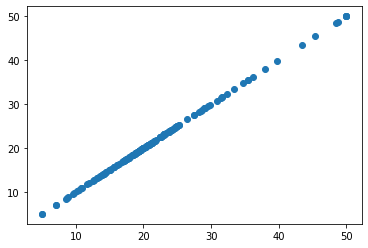

In [15]:
plt.scatter(Y_test, y_pred)
plt.show()